# A matrix approach to quantum tunnelling


The phonomenon of quantum tunnelling is useful to show how quantum mechanics differs from classical mechanics. A classical particle moving toward a potential barrier would be totally reflected back unless it had enough kinetic energy to overcome the barrier. A quantum particle can instead overcome the barrier even if its kinetic energy is not apparently sufficent. In order to study this phenomenon we can solve Schrödinger equation taking into account the presence of a finite potential in a specific region of the space. What we obtain from the analytic solution of the equation is the following set of equations describing the behaviour of the wave in the three different regions of space: 

$$\begin{cases}
\psi_{I}(x) = Ae^{ikx} + Be^{-ikx}  & x < 0 \\ 
\psi_{II}(x) = Fe^{-\beta x} + Ge^{\beta x}   & 0 \leq x \leq l \hspace{1cm} & \mbox{(the region where potential is present)} \\ 
\psi_{III}(x) = Ce^{ikx} + De^{-ikx} & x > l
\end{cases}$$ 



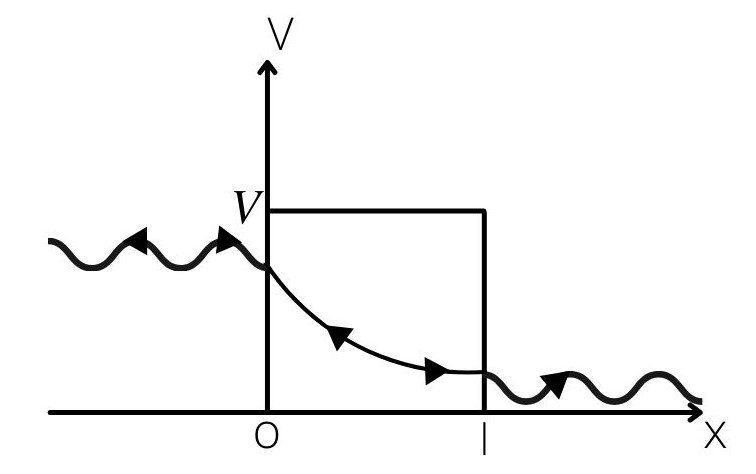

The picture shows the three regions of the graph where we solved Schrödinger equation. The arrows represent the waves propagating forward and backward. As we can see we are imposing that the wave propagates only forward for $x>l$, hence we are setting the constant D=0. 

We adopt the Rydberg atomic units in order to simplify our calculation: $2m_{e} = \hbar = 1$. In this way the terms $k$ and $\beta$ apperaing in Schrödinger equation become:

$$\begin{cases}
k=\sqrt\frac{2m_e E}{\hbar^2} \rightarrow \sqrt{E} \\
\beta=\sqrt \frac{2m_e(V_0-E)}{\hbar^2} \rightarrow \sqrt{(V_0-E)}
\end{cases}$$


We are interested in finding a ratio between the probability density of finding the quantum particle before and after the barrier and we call this ratio "transmission coefficient": 

$$T= \frac{|Ce^{ikx}|^2}{|Ae^{ikx}|^2} =\lvert\frac{C}{A}\rvert^2$$

The core of our problem is to impose continuity between the functions and their derivatives which leads us to the following system of equations:

$$\begin{cases}
A + B = F + G \\ 
ikA - ikB = -\beta F + \beta G \\ 
Fe^{-\beta l} + Ge^{\beta l} = Ce^{ikl} + De^{-ikl} \\
-\beta F e^{-\beta l} + \beta Ge^{\beta l} = ikCe^{ikl} - ikDe^{-ikl}
\end{cases}$$ 

At this point the problem becomes solvable by the means of linear algebra and so it is easily executable for a computer.

$$M_{1} = \begin{pmatrix}
1 & 1 \\
ik & -ik 
\end{pmatrix} \hspace{1cm} M_{2} = \begin{pmatrix}
1 & 1 \\
-\beta & \beta 
\end{pmatrix}$$

$$M_{3} = \begin{pmatrix}
e^{-\beta l} & e^{\beta l} \\
-\beta e^{-\beta l} &\beta e^{\beta l} 
\end{pmatrix} \hspace{1cm} M_{4} = \begin{pmatrix}
e^{ikl} & e^{-ikl} \\
ik e^{ikl} & -ik e^{-ikl}
\end{pmatrix}$$

$$V=M_1^{-1}M_2M_3^{-1}M_4$$

Starting from the previous set of equations and setting $D=0$ we obtain:

$$ \begin{pmatrix}
A  \\
B 
\end{pmatrix} = V \begin{pmatrix} C \\ 0 \end{pmatrix}$$

$$T= \frac{|Ce^{ikx}|^2}{|Ae^{ikx}|^2} =\lvert\frac{C}{A}\rvert^2=\lvert\frac{C}{V_{11}C}\rvert^2=\lvert\frac{1}{V_{11}}\rvert^2$$

If proceeded analitically we would have found A to be:

$$A = \frac{1}{2}Ce^{ikl}[2\cosh{\beta l} + i(\frac{\beta}{l} - \frac{k}{\beta})\sinh{\beta l}]$$

At this point, if we introduce A in the formula of the transmission coefficient we found before, after some computation we find an analytic expression for T:

$$T=[1+\frac{V_0^2 sinh^2(\beta l)}{4E(V_0-E)}]^{-1}\$$

We can now proceed to the computation of the transmission coefficient T. Let's remind that we have two ways to compute it: a matrix-based way and an analitycal method. It is important to obtain the same result with both methods.

Let's import some helpful libraries we will use to get get the Transmission coefficient.

In [5]:
import numpy as np
from math import sqrt, exp, sinh
import cmath
import matplotlib.pyplot as plt

## Transmission coefficient by an analytical approach

First let's define some functions to evaluate the Transmission coefficient analytically.

In [25]:
def T_by_function(E, V0, l, m):
  E[np.where(E == 0)] = 0.0001 # 0 neergy is not admitted
  E[np.where(E == V0)] ++ 0.0001 # To avoid discontinuity at E = V0 (Division by zero)
  k = m*np.sqrt(E)
  E1 = E[E < V0]
  beta1 = m*np.sqrt(V0 - E1)
  T_func1 = 1/(1 + ((V0 * np.sinh(beta1*l))**2/(4*np.multiply(E1, V0-E1))))
  E2 = E[E > V0]
  beta2 = 1j*m*np.sqrt(E2 - V0)
  T_func2 = 1/(1 + ((V0 * np.sinh(beta2*l))**2/(4*np.multiply(E2, V0-E2))))
  return E1, E2, T_func1.real, T_func2.real

In [26]:
def T_by_function_sigle_value(E, V0, l, m):
  k = m*np.sqrt(E)
  if E < V0:
    beta = m*np.sqrt(V0 - E)
    T_func = 1/(1 + ((V0 * np.sinh(beta*l))**2/(4*np.multiply(E, V0-E))))
  else:
    beta = 1j*m*np.sqrt(E - V0)
    T_func = 1/(1 + ((V0 * np.sinh(beta*l))**2/(4*np.multiply(E, V0-E))))
  return E, T_func.real

Let's define the potential barrier height and the energy range of the electron. We will evaluate the Transmission coefficient $T$ over all the energies defined here.

In [27]:
V0 = 2
maxlen=int(3*V0)
e = np.linspace(0, maxlen, 1000)
lengths = [1, 2, 3, 9]
colors = ['b', 'r', 'g', 'c', 'm', 'y', 'k']

Now let's compute the Transmission coefficient at different barrier length $1,2,3,9$. The classical limit is marked by the black, dashed line.

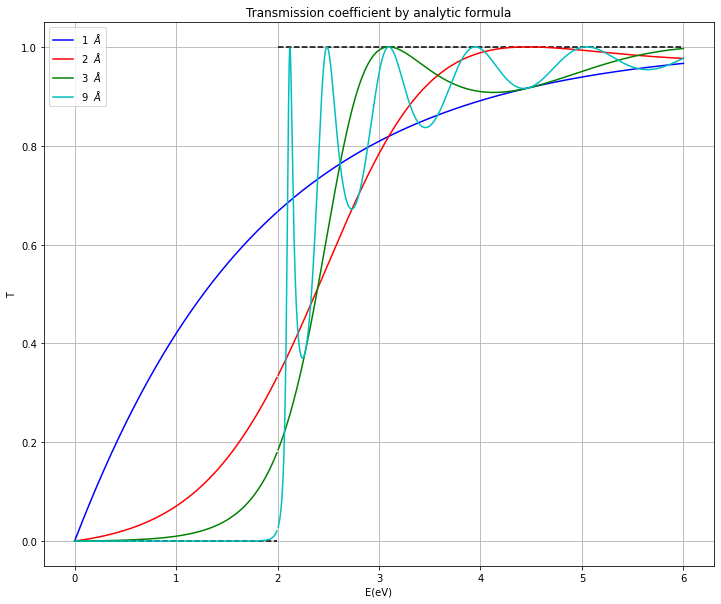

In [9]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(1, 1, 1)
# add title and x/y labels
ax.set_title('Transmission coefficient by analytic formula')
ax.set_ylabel('T')
ax.set_xlabel('E(eV)')
# plot the classical potential
E1=e[e<V0]
E2=e[e>V0]
plt.plot(E1, np.zeros(E1.shape), 'k', linestyle = 'dashed')
plt.plot(E2, np.ones(E2.shape), 'k', linestyle = 'dashed')
m = 1
for i, l in enumerate(lengths):
  E1, E2, T_func1, T_func2 = T_by_function(e, V0, l, m)
  plt.plot(E1, T_func1, c=colors[i%len(colors)], label = str(l) + "  $\AA$")
  plt.plot(E2, T_func2, c=colors[i%len(colors)])
# show the plot
plt.grid(True)
plt.legend()
plt.show()

## Transmission coefficient by a Matrix approach

Let's define a function to compute the manipulation of the matrices involved in evaluation of the Trasmission coefficient.

In [10]:
def T_by_matrix(E, V0, l, m):
    if E == 0:
      E = 0.01
    #To avoid discontinuity at E = V0 (Division by zero)
    if E == V0:
        E = E + 0.001
    k = m*cmath.sqrt(E)
    beta = m*cmath.sqrt(V0 - E)
    M1 = np.array([[1, 1], [k*1j, -k*1j]])
    M2 = np.array([[1, 1], [-beta, beta]])
    M3 = np.array([[cmath.exp(-beta*l), cmath.exp(beta*l)], [-beta*cmath.exp(-beta*l), beta*cmath.exp(beta*l)]])
    M4 = np.array([[cmath.exp(1j*k*l), cmath.exp(-1j*k*l)], [1j*k*cmath.exp(1j*k*l), -1j*k*cmath.exp(-1j*k*l)]])

    V = np.dot(np.linalg.inv(M1), np.dot(M2, np.dot(np.linalg.inv(M3), M4)))
    #print(f"The term V00 is: {V[0, 0]}")
    T = (1/abs(V[0, 0]))**2
    return T

Now we are going to evaluate the  Transmission coefficient $T$ for different barrier lenghts and on the same range of energies we used before for the analytical approach.

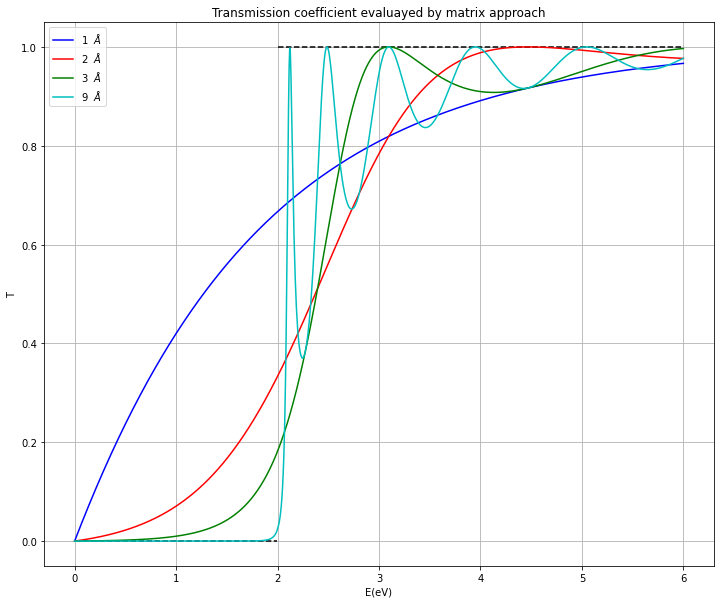

In [11]:
fig = plt.figure(figsize=(12,10))
colors = ['b', 'r', 'g', 'c', 'm', 'y', 'k']
#lengths.extend(range(1,maxlen,lenstep))
ax = fig.add_subplot(1, 1, 1)
# add title and x/y labels
ax.set_title('Transmission coefficient evaluayed by matrix approach')
ax.set_ylabel('T')
ax.set_xlabel('E(eV)')
# plot the classical potential
E1=e[e<V0]
E2=e[e>V0]
plt.plot(E1, np.zeros(E1.shape), 'k', linestyle = 'dashed')
plt.plot(E2, np.ones(E2.shape), 'k', linestyle = 'dashed')
m = 1
for i, l in enumerate(lengths):
  T_matrix = []
  for energy in e:
    T_matrix.append(T_by_matrix(energy, V0, l, m))
  plt.plot(e, T_matrix, c=colors[i%len(colors)], label = str(l) + "  $\AA$")
plt.grid(True)
plt.legend()
plt.show()

In [12]:
E = 1
V0 = 2
if E == V0:
  E = E - 0.0001
l = 1

In [13]:
T = T_by_matrix(E, V0, l, m)
print(f"The value of the transmission coefficient is: {T}")

The value of the transmission coefficient is: 0.4199743416140263


In [14]:
E, T_func = T_by_function_sigle_value(E, V0, l, m)
print(f"The value of the transmission coefficient by using the formula is: {T_func.real}")

The value of the transmission coefficient by using the formula is: 0.4199743416140261


## Remarks

- In order to avoid numerical issues when $E=V_0$ or $E=0$ the value of $E$ has been sligtly modified (increases or decreased).
- When $E<V_0$ the $\beta$ parameter is real. When $E>V_0$ the $\beta$ parameter is complex. So I had to use the function cmath.sqrt in order to evaluate the $\beta$ value.
- The Transmission coefficient evaluated by the Analytical and Matrix approach are exactly the same.

# Question1

As we can observe from the graphs we obtained both from the matrix and analytic methods, the transmission coefficient is influenced by the length of the potential well. If this length is short (for example 1 $\mathring A$) the transmission coefficient is high even for $E < V_{0}$ and then tends to 1 for $E > V_{0}$. Anyway, the situation changes if we incrase the length of the well. In this other cases the transmission coefficient is remarkably lower for $E < V_{0}$ (for a length equal to 9 $\mathring A$ it is almost equal to zero) and then, for $E > V_{0}$ it goes to one with oscillatory behaviour.

# Question2

If $T=1$ there is no reflected wave. So the are impying wave is fully trasmitted. Before proceeding to find the values of $E$ for which $T$ = 1 we have to impose $ E \neq V_{0}$:

$$[1+\frac{V_0^2 sinh^2(\beta l)}{4E(V_0-E)}]^{-1}=1$$

$$1+\frac{V_0^2 sinh^2(\beta l)}{4E(V_0-E)}=1$$

$$\frac{V_0^2 sinh^2(\beta l)}{4E(V_0-E)}=0$$

The upward expression becomes zero if:

$$sinh^2(\beta l)=0$$

$$sinh(\beta l)=0$$

We know that:

$$sinh(x)=\frac{e^{x}-e^{-x}}{2}$$

So we get:

$$e^{\beta l}=e^{-\beta l}$$

$$e^{l \sqrt{(V_0-E)}}=e^{-l\sqrt{(V_0-E)}}$$

We have to differ if $E<V_0$ or $E>V_0$. Since we are finding the values of $E$ for which $T$ = 1 we can study the case $E>V_0$. In this circumstance the previous expression becomes:

$$ e^{il\sqrt{E - V_{0}}} = e^{-il\sqrt{E - V_{0}}} $$

$$ \cos{(l\sqrt{E - V_{0}})} + i\sin{(l\sqrt{E - V_{0}})} = \cos{(l\sqrt{E - V_{0}})} - i\sin{(l\sqrt{E - V_{0}})} $$

$$ 2i\sin{(l\sqrt{E - V_{0}})} = 0$$

$$ \sin{(l\sqrt{E - V_{0}})} = 0 $$

$$ l\sqrt{E - V_{0}} = k\pi, \hspace{1cm} k \in Z  $$

Hence the energies at which the transmission coefficient is 1 are:

$$ E = V_{0} + (\frac{k\pi}{l})^2 $$

If we increase the length of the potential well we can observe that these points are much closer than in a case of a short potential well. This agrees with the graphs we obtained previously, where a dense oscillatory behaviour is found at large $l$.

# Question 4

When we introduced the Rydberg atomic units at the beginning of the discussion we set $2m_{e}$ = $\hbar$ = 1, hence we where assuming our quantum particle to be an electron. We ask ourselves how should we modify our units if the choosen particle was a proton. As we did for the electron, we define the two factors $k_{p}$ and $\beta_{p}$ which are now taking into account the mass of the proton:

$$\begin{cases}
k_{p}=\sqrt\frac{2m_p E}{\hbar^2}  \\
\beta_{p}=\sqrt \frac{2m_p(V_0-E)}{\hbar^2} 
\end{cases}$$




At this point we divide the $k$ and $\beta$ we found at the beginning of the discussion by those we have just found:

$$\frac{k}{k_{p}} = \frac{\sqrt\frac{2m_e E}{\hbar^2}}{\sqrt\frac{2m_p E}{\hbar^2}} = 0,023 \rightarrow k_{p} = 42,84k$$

The same holds for $\beta_{p}$:

$$ \beta_{p} = 42,84\beta$$

We can now modify our previous program and check how the transmission coefficient changes:

<ipython-input-25-3a82eb93d6f7>:7: RuntimeWarning: overflow encountered in square
  T_func1 = 1/(1 + ((V0 * np.sinh(beta1*l))**2/(4*np.multiply(E1, V0-E1))))


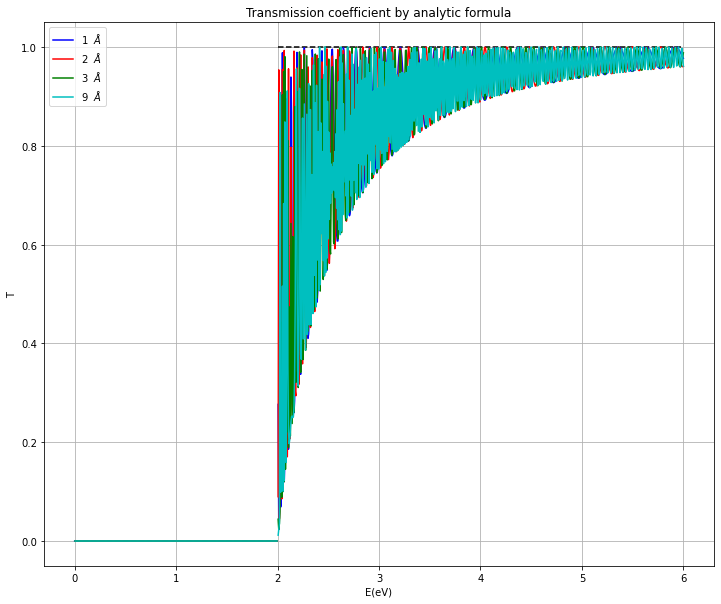

In [28]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(1, 1, 1)
# add title and x/y labels
ax.set_title('Transmission coefficient by analytic formula')
ax.set_ylabel('T')
ax.set_xlabel('E(eV)')
# plot the classical potential
E1=e[e<V0]
E2=e[e>V0]
plt.plot(E1, np.zeros(E1.shape), 'k', linestyle = 'dashed')
plt.plot(E2, np.ones(E2.shape), 'k', linestyle = 'dashed')
m = 42.84
for i, l in enumerate(lengths):
  E1, E2, T_func1, T_func2 = T_by_function(e, V0, l, m)
  plt.plot(E1, T_func1, c=colors[i%len(colors)], label = str(l) + "  $\AA$")
  plt.plot(E2, T_func2, c=colors[i%len(colors)])
# show the plot
plt.grid(True)
plt.legend()
plt.show()

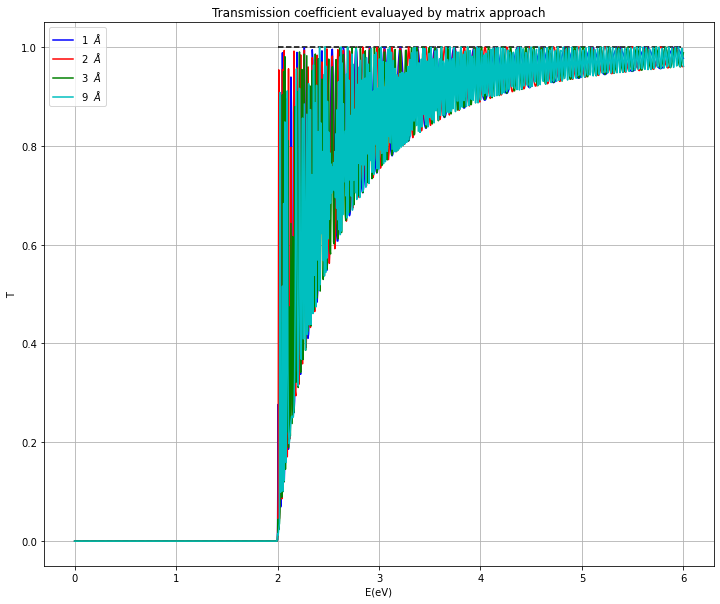

In [23]:
fig = plt.figure(figsize=(12,10))
colors = ['b', 'r', 'g', 'c', 'm', 'y', 'k']
#lengths.extend(range(1,maxlen,lenstep))
ax = fig.add_subplot(1, 1, 1)
# add title and x/y labels
ax.set_title('Transmission coefficient evaluayed by matrix approach')
ax.set_ylabel('T')
ax.set_xlabel('E(eV)')
# plot the classical potential
E1=e[e<V0]
E2=e[e>V0]
plt.plot(E1, np.zeros(E1.shape), 'k', linestyle = 'dashed')
plt.plot(E2, np.ones(E2.shape), 'k', linestyle = 'dashed')
m = 42.84
for i, l in enumerate(lengths):
  T_matrix = []
  for energy in e:
    T_matrix.append(T_by_matrix(energy, V0, l, m))
  plt.plot(e, T_matrix, c=colors[i%len(colors)], label = str(l) + "  $\AA$")
plt.grid(True)
plt.legend()
plt.show()

As we notice, the transmission coefficient for a proton having energy lower than  the heigth of the potential barrier is zero. If the energy is higher the coefficient tends to 1 but the oscillatory behaviour becomes dominant. We can explain this behaviour by taking into account the formula we found in question 3, when we discussed for which energies the transmission coefficient equals 1:

$$ E = V_{0} + (\frac{k\pi}{l})^2 $$



If we repeat the derivation of this formula by taking into account the mass of the proton (hence by inserting the factor 42,85 in front of $k$ and $\beta$) we obtain:

$$ E = V_{0} + (\frac{k\pi}{42,84 l})^2 $$

Thus in the case of a proton the oscillatory behaviour becomes even more dense than the case of an electorn.